Вопросы:

Какие персонажи составляют топ-5 по количеству реплик?

Кто с кем разговаривает и с какой частотой? (используйте heatmap)

Какая локация - самая популярная? (где чаще всего происходят действия)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
charactersData=pd.read_csv('/content/simpsons_characters.xls')
episodesData=pd.read_csv('/content/simpsons_episodes.xls')
locationsData=pd.read_csv('/content/simpsons_locations.xls')
scriptData=pd.read_csv('/content/simpsons_script_lines.csv',on_bad_lines='skip')

/tmp/ipython-input-1535038101.py:4: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  scriptData=pd.read_csv('/content/simpsons_script_lines.csv',on_bad_lines='skip')


In [9]:
charactersData.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [10]:
episodesData.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


In [14]:
locationsData.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [34]:
scriptData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158271 non-null  int64  
 1   episode_id          158271 non-null  int64  
 2   number              158271 non-null  int64  
 3   raw_text            158271 non-null  object 
 4   timestamp_in_ms     158271 non-null  object 
 5   speaking_line       158271 non-null  object 
 6   character_id        140750 non-null  object 
 7   location_id         157864 non-null  float64
 8   raw_character_text  140749 non-null  object 
 9   raw_location_text   157863 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


In [15]:
scriptData.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [26]:
scriptData["raw_character_text"].value_counts().tolist()[:5]

[29842, 14159, 13777, 11502, 3172]

In [31]:
def getTopChars(count=5):
  topCharacters=scriptData["raw_character_text"].value_counts().index[:count]
  topCharactersFreq=scriptData["raw_character_text"].value_counts().tolist()[:count]

  plt.figure(figsize=(8,8))
  plt.pie(topCharactersFreq, labels=topCharacters)
  plt.show()


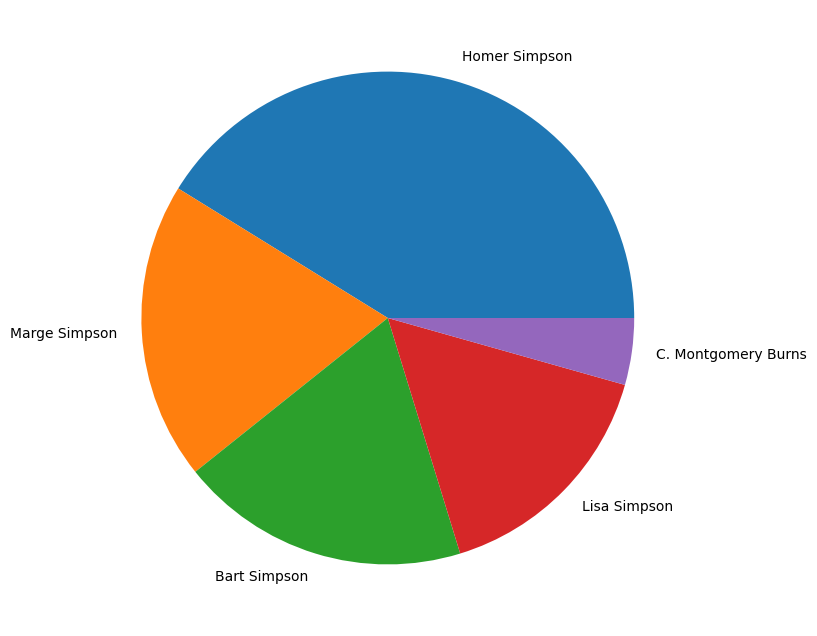

In [33]:
getTopChars()

In [124]:
def showDialogue(charNumber=5):
  topCharacters=scriptData["raw_character_text"].value_counts().index[:charNumber]
  filtered=scriptData[np.where(scriptData["raw_character_text"].isin(topCharacters),True,False)]

  dialogue={"x1":filtered.raw_character_text[:-1].values,"x2":filtered.raw_character_text[1:].values}
  dialogue=pd.DataFrame.from_dict(dialogue)
  dialogue=dialogue[np.where(dialogue["x1"] != dialogue["x2"],True,False)]
  dialogue=pd.get_dummies(dialogue["x1"]).groupby(dialogue["x2"]).apply(sum)

  fig, ax=plt.subplots(figsize=(8,8))
  im = ax.imshow(dialogue.values,aspect="auto")

  ax.set_xticks(np.arange(len(dialogue.columns)))
  ax.set_yticks(np.arange(len(dialogue.index)))
  ax.set_xticklabels(dialogue.columns)
  ax.set_yticklabels(dialogue.index)
  for i in range(len(dialogue.index)):
    for j in range(len(dialogue.columns)):
      text=ax.text(j,i,int(dialogue.values[i,j]),ha="center")

  plt.colorbar(im,ax=ax)

  plt.show()


/tmp/ipython-input-2475424219.py:8: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  dialogue=pd.get_dummies(dialogue["x1"]).groupby(dialogue["x2"]).apply(sum)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


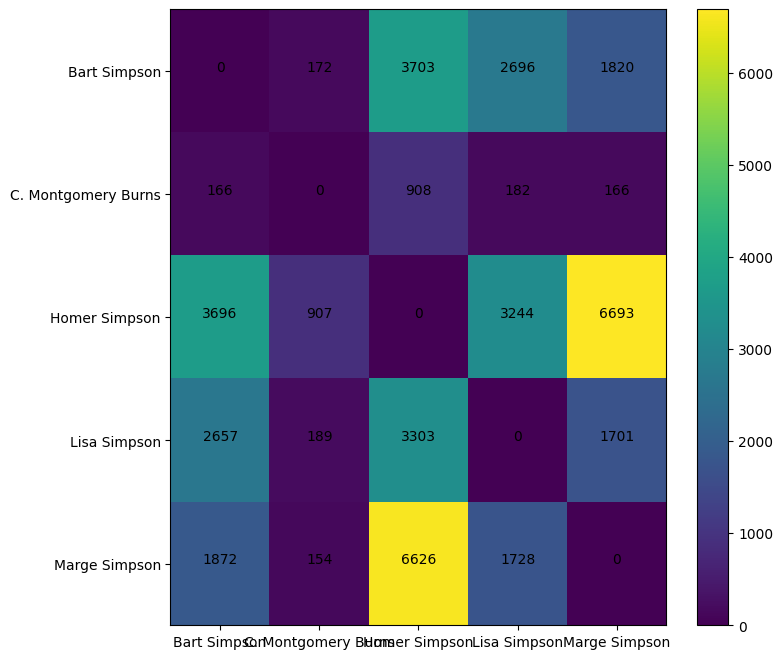

In [126]:
showDialogue(5)

In [131]:
def showLocation(number=6):
  topLocations=scriptData["raw_location_text"].value_counts().index[:number]
  topLocationsFreq=scriptData["raw_location_text"].value_counts().tolist()[:number]

  fig=plt.figure(figsize=(15,10))

  plt.barh(topLocations,topLocationsFreq)
  plt.ylabel("Локация")
  plt.xlabel("Популярность")
  plt.title("Самые популярные локации")


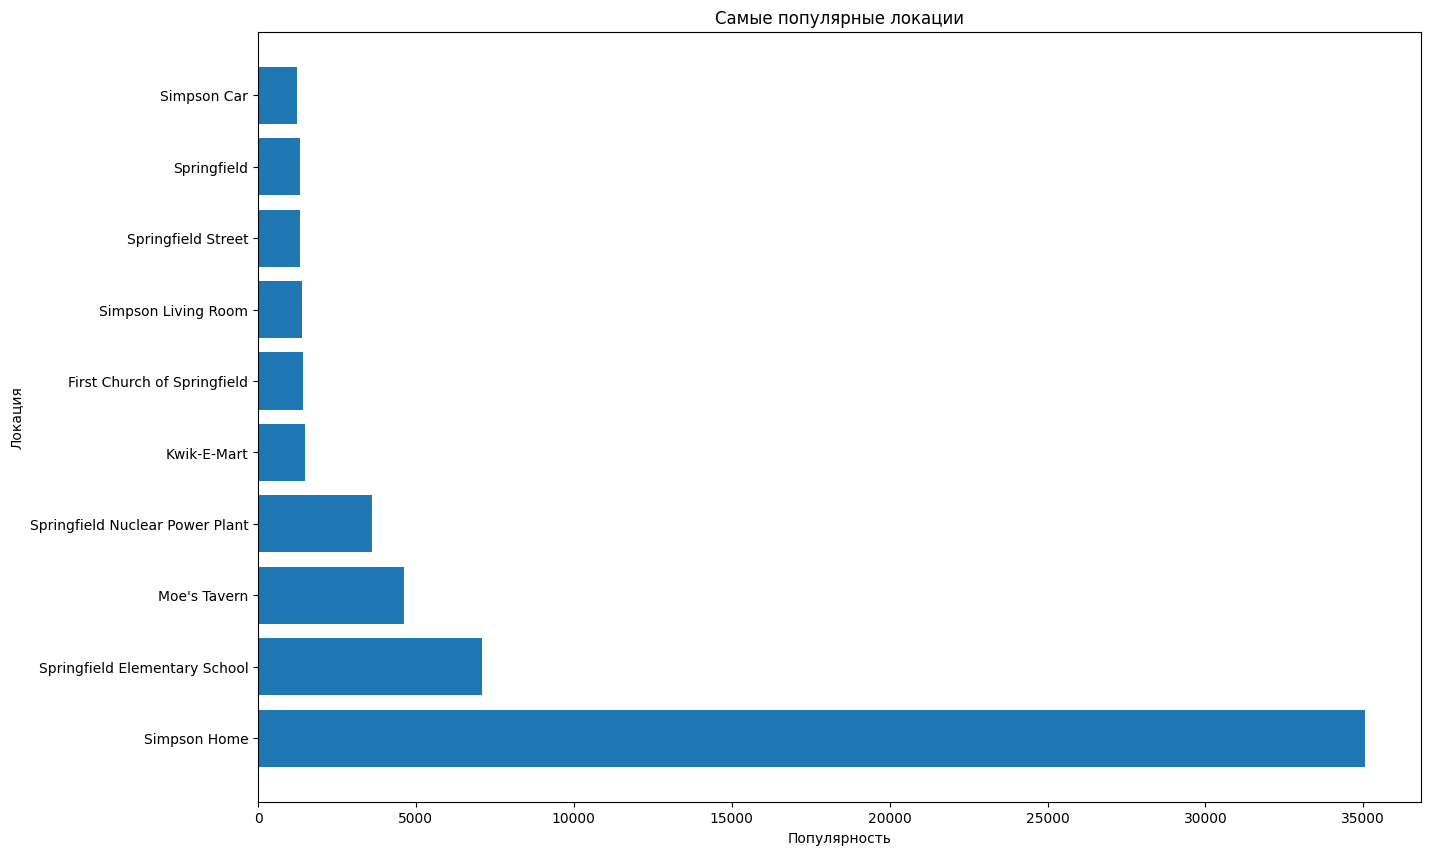

In [133]:
showLocation(10)